In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
%matplotlib inline

In [2]:
full = pd.read_csv('full_feature_cleaned.csv')
full.head()

,timestamp,load,weathertime,temperature,dewpoint,humidity,pressure,wind_dir,wind_speed,precip,...,uv_index,dow,doy,day,month,hour,minute,t_m24,t_m48,tdif
0,2012-10-27 00:05:00,700.7,2012-10-27 00:08:00,11.2,9.9,92,1018.8,SW,4.8,0.0,...,0.0,5,301,27,10,0,5,700.7,700.7,0.0
1,2012-10-27 00:10:00,694.7,2012-10-27 00:08:00,11.2,9.9,92,1018.8,SW,4.8,0.0,...,0.0,5,301,27,10,0,10,694.7,694.7,0.0
2,2012-10-27 00:15:00,692.8,2012-10-27 00:14:00,11.3,9.9,91,1018.8,SW,6.4,0.0,...,0.0,5,301,27,10,0,15,692.8,692.8,0.0
3,2012-10-27 00:20:00,686.5,2012-10-27 00:25:00,11.2,9.9,92,1018.8,SW,3.2,0.0,...,0.0,5,301,27,10,0,20,686.5,686.5,0.0
4,2012-10-27 00:25:00,685.3,2012-10-27 00:25:00,11.2,9.9,92,1018.8,SW,3.2,0.0,...,0.0,5,301,27,10,0,25,685.3,685.3,0.0


#### Gradient Boosting Regression

In [3]:
full.columns

Index(['timestamp', 'load', 'weathertime', 'temperature', 'dewpoint',
       'humidity', 'pressure', 'wind_dir', 'wind_speed', 'precip',
       'solarradiation', 'uv_index', 'dow', 'doy', 'day', 'month', 'hour',
       'minute', 't_m24', 't_m48', 'tdif'],
      dtype='object')

In [62]:
features = [
    'temperature', 
    'dewpoint',
    'humidity', 
    'pressure', 
    'wind_speed', 
    'precip',
    'solarradiation', 
    'uv_index', 
    'dow', 
    'doy', 
    'day', 
    'month', 
    'hour',
    'minute', 
#     't_m24', 
#     't_m48', 
#     'tdif'
]

In [63]:
X = full[features]
y = full['load']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [65]:
gbr = GradientBoostingRegressor(loss='ls', n_estimators=100, max_depth=5, verbose=1, warm_start=True, )

In [66]:
gbr_fitted = gbr.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1       17879.4982           59.00s
         2       16757.4074           57.36s
         3       15839.5489           55.96s
         4       15075.7638           56.28s
         5       14428.7992           59.80s
         6       13906.7635            1.02m
         7       13440.8642           59.15s
         8       13046.8385           59.17s
         9       12692.5164           57.43s
        10       12413.5518           57.66s
        20       10848.4657           48.80s
        30       10226.5599           40.32s
        40        9724.7890           33.75s
        50        9382.1286           27.68s
        60        9168.1453           21.63s
        70        8956.7336           15.83s
        80        8717.8416           10.29s
        90        8459.8503            5.08s
       100        8186.0426            0.00s


In [70]:
gbr.score(X_test, y_test)

0.57419066292816789

In [71]:
gbr.feature_importances_

array([  1.52082165e-01,   1.15121929e-01,   5.05812918e-02,
         1.24392351e-01,   3.08138495e-02,   1.79621336e-02,
         7.29367297e-03,   1.31118840e-02,   4.66312398e-02,
         2.77192810e-01,   1.02430021e-01,   8.21324765e-03,
         2.49409276e-04,   5.39239962e-02])

In [72]:
for i in zip(features,[round(float(i), 4) for i in gbr.feature_importances_]):
    print(i)

('temperature', 0.1521)
('dewpoint', 0.1151)
('humidity', 0.0506)
('pressure', 0.1244)
('wind_speed', 0.0308)
('precip', 0.018)
('solarradiation', 0.0073)
('uv_index', 0.0131)
('dow', 0.0466)
('doy', 0.2772)
('day', 0.1024)
('month', 0.0082)
('hour', 0.0002)
('minute', 0.0539)


[Text(0,0,'temperature'),
 Text(0,0,'dewpoint'),
 Text(0,0,'humidity'),
 Text(0,0,'pressure'),
 Text(0,0,'wind_speed'),
 Text(0,0,'precip'),
 Text(0,0,'solarradiation'),
 Text(0,0,'uv_index'),
 Text(0,0,'dow'),
 Text(0,0,'doy'),
 Text(0,0,'day'),
 Text(0,0,'month'),
 Text(0,0,'hour'),
 Text(0,0,'minute')]

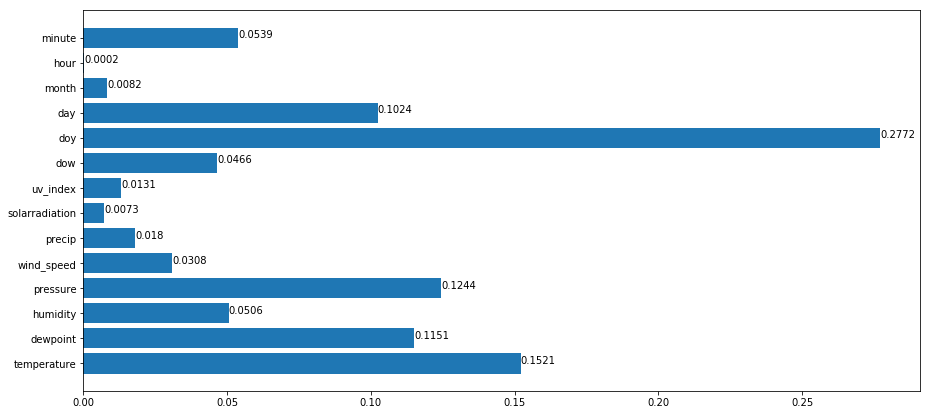

In [73]:
fi = [round(float(i), 4) for i in gbr.feature_importances_]
fig,ax = plt.subplots(figsize=(15,7),)
ax.barh(np.arange(len(fi)), fi)
for i,v in enumerate(fi):
    ax.text(v, i, str(v))
ax.set_yticks(np.arange(len(fi)))
ax.set_yticklabels(features)

In [76]:
new_features = [
    'temperature', 
    'dewpoint',
    'humidity', 
    'pressure', 
    'wind_speed', 
#     'precip',
#     'solarradiation', 
#     'uv_index', 
    'dow', 
    'doy', 
    'day', 
#     'month', 
#     'hour',
    'minute', 
#     't_m24', 
#     't_m48', 
#     'tdif'
]

In [77]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

In [79]:
n_estimators = [50, 100, 150, 200, 300, 400, 500]
max_depth = np.arange(2,6)
parameters = dict(n_estimators=n_estimators, max_depth=max_depth)
# parameters = dict(max_depth=max_depth)
gbr2 = GradientBoostingRegressor(random_state=40)
grid = GridSearchCV(gbr2, param_grid=parameters, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)
print('the best params are: ', grid.best_params_)
print('the best score is: ', grid.best_score_)

the best params are:  {'n_estimators': 500, 'max_depth': 5}
the best score is:  -3268.43667291


#### XGboost

In [80]:
xgb = XGBRegressor(eta=0.1, colsample_bytree=0.5, subsample=0.5, 
                       max_depth=5, min_child_weight=3)